In [18]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

In [19]:
train_data=pd.read_csv("/kaggle/input/ag-news-classification-dataset/train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("/kaggle/input/ag-news-classification-dataset/test.csv",header=0,names=['classid','title','desc'])

In [20]:
train_data.head()

classid                                              title  \
0        3  Wall St. Bears Claw Back Into the Black (Reuters)   
1        3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2        3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3        3  Iraq Halts Oil Exports from Main Southern Pipe...   
4        3  Oil prices soar to all-time record, posing new...   

                                                desc  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

In [21]:
test_data.head()

classid                                              title  \
0        3                  Fears for T N pension after talks   
1        4  The Race is On: Second Private Team Sets Launc...   
2        4      Ky. Company Wins Grant to Study Peptides (AP)   
3        4      Prediction Unit Helps Forecast Wildfires (AP)   
4        4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                                desc  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...

In [22]:
train_x=train_data.desc[:60000]
test_x=test_data.desc
train_y=train_data.classid[:60000]
test_y=test_data.classid

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


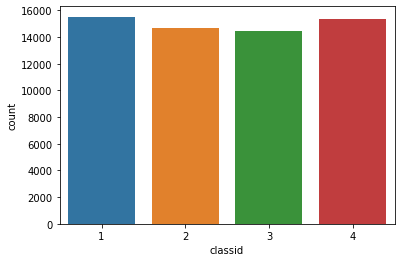

In [23]:
df=train_data[:60000]
sns.countplot(df.classid);

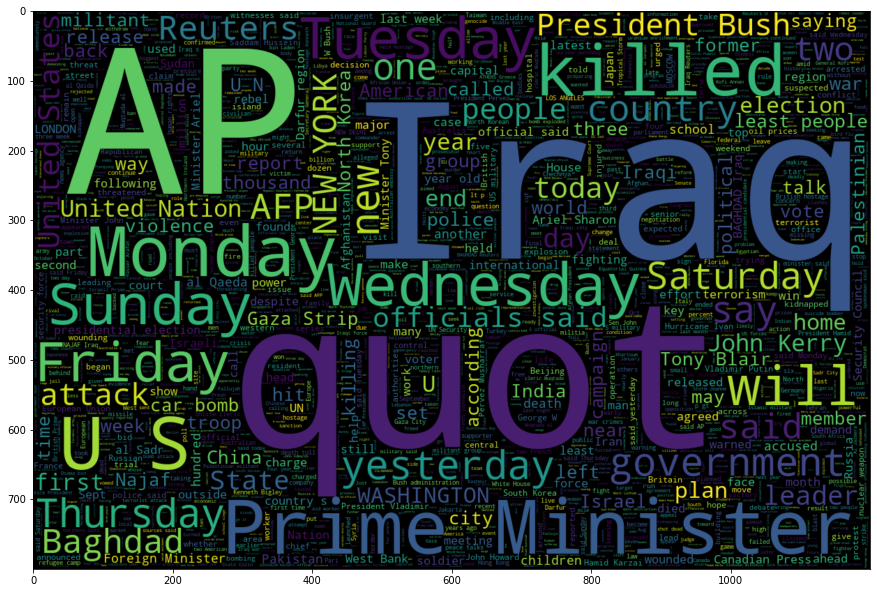

In [24]:
world = df.desc[df.classid[df.classid==1].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world))
plt.imshow(wordcloud,interpolation = 'bilinear');

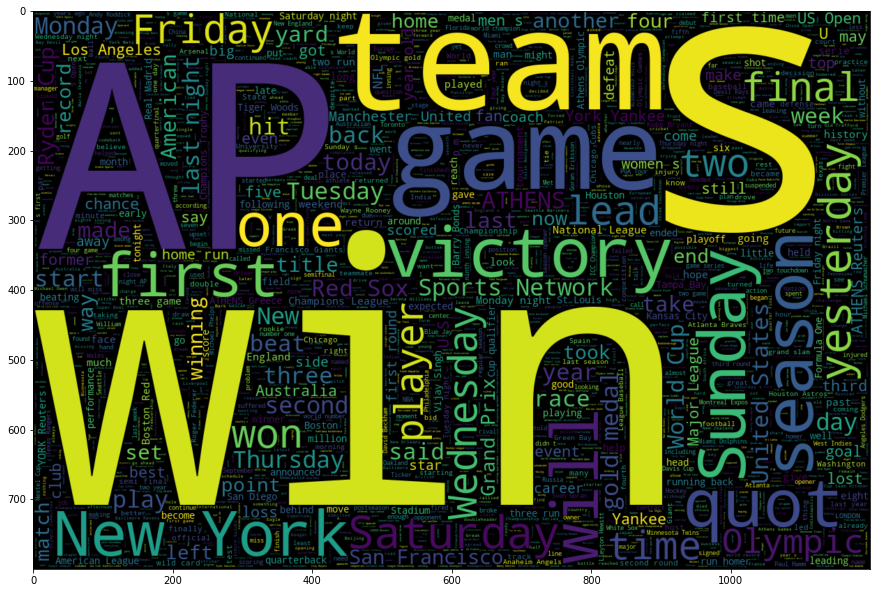

In [25]:
sports = df.desc[df.classid[df.classid==2].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sports))
plt.imshow(wordcloud,interpolation = 'bilinear');

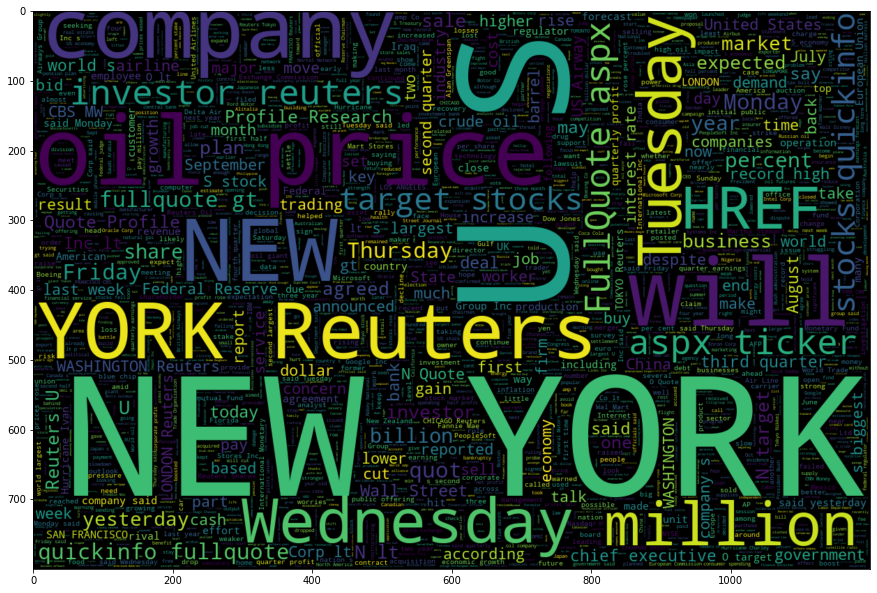

In [26]:
biz = df.desc[df.classid[df.classid==3].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(biz))
plt.imshow(wordcloud,interpolation = 'bilinear');

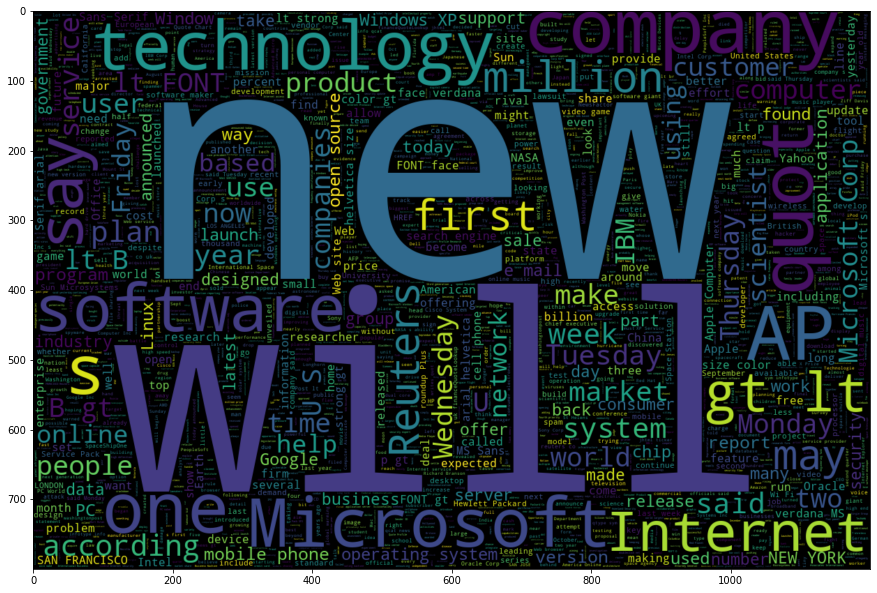

In [27]:
sci = df.desc[df.classid[df.classid==4].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear');

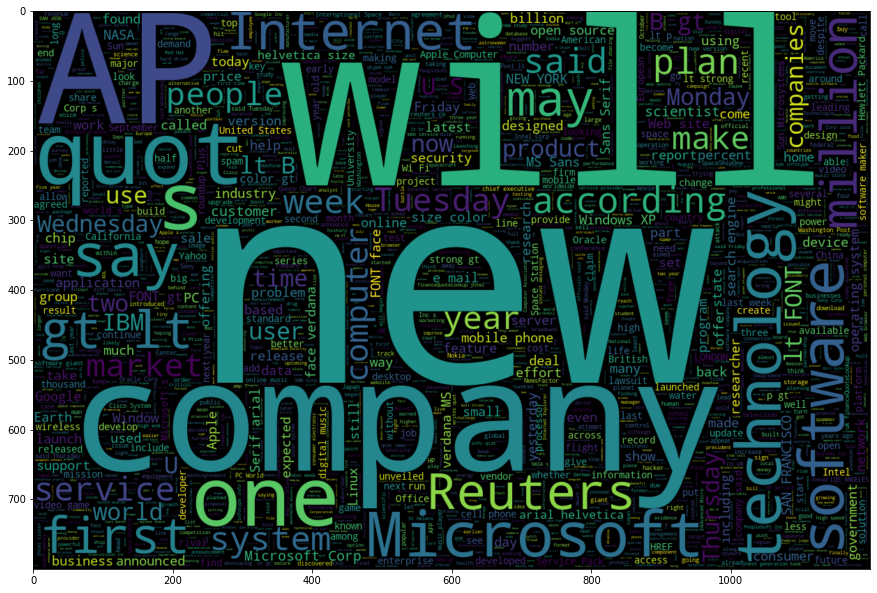

In [28]:
sci = df.desc[df.classid[df.classid==4].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [29]:
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)

In [37]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")